<a href="https://colab.research.google.com/github/luisantoniourbanaviles/Simulacion-II/blob/main/Optimizacion/Optimizacion_y_algoritmos_geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimizacion no lineal

La idea principal de la optimizacion es encontrar el valor minimo (o maximo) global de algun modelo matematico

Ya que estos pueden representar el minimo costo por la adquisición de nueva maquinaria, o el maximo beneficio de la extracion de un pozo petrolero

El objetivo principal se centra en encontrar cierto valor "x", que cumpla la siguiente definición

Definicion

Sea un punto $x^*$.

 $x^*$ es un minimo global de la funcion $f : S → R$ si y solo si para todo x ∈ S se cumple que:

\begin{equation}
  f(x^*)\leq f(x)
\end{equation}

Hay dos situaciones

1 - El minimo de la funcion f se puede encontrar de manera analitica

2 - El minimo de la funcion f no se puede encontrar de manera analitica, en cuyo caso, podemos recurrir a resolverlo mediante metodos numericos, pero, lo mas que podemos aspirar es a la siguiente definicion

Un punto $x^*$ es un minimo local (o minimo relativo) de la funcion $f : S → R$, si y solo si, existe un $\epsilon > 0$, tal que para todo x que satisface $|x-x^*|<ϵ$ se cumple que:

\begin{equation}
f(x^*) ≤ f(x).
\end{equation}

En otras palabras, el minimo esta restringido a una cierta vecindad

De esa forma, podriamos buscar puntos optimos, y seleccionar el minimo (o maximo) local mas pequeño encontrado

Existen varios metodos para minimizar funciones, de los cuales los mas representativo son el metodo de Newton y el metodo de gradientes conjugados

Los cuales se desarrollaran a continuacion

###Metodo de newton


El metodo de Newton utiliza informacion de primer y segundo orden. En otras palabras, primera y segunda derivda.

La idea detras del metodo de Newton es

Tenemos cierta funcion $f$

Dado un punto de partida $x^k$, construimos una aproximacion cuadratica $q$
de la funcion objetivo $f$, haciendo coincidir la primera y segunda derivada
de ambas funciones, evaluadas en dicho punto $x^k$

Luego minimizamos la funcion aproximada $q$ en vez de la
funcion objetivo original f, este paso es simple dado que la funcion $q$ fue
propuesta y su optimo es conocido.

Luego, utilizamos el vector $x^{k+1}$
minimo de la funcion aproximada $q% como punto de partida en el siguiente
paso y repetimos el procedimiento iterativamente.

Nota: Si la funcion objetivo original es cuadratica, entonces la primera
aproximacion es exacta, y el metodo produce el vector minimo verdadero
en un paso



Desarrolo del metodo

Sea una funcion

\begin{equation}
f : R^n → R
\end{equation}

que es por lo menos $C^2$ derivable

Entonces, su expansion en serie de Taylor de $f$ sobre un punto incial $x^k$, esta definida por

\begin{equation}
  f(x) \approx f(x^k) + (x - x^k)f^{'}(x^k) +\frac{1}{2}(x - x^k)^2f^{''}(x^k)
\end{equation}

o bien

\begin{equation}
  f(x) \approx f(x^k) + (x - x^k)^T\nabla f(x^k) +\frac{1}{2}(x - x^k)^TH(x^k)(x - x^k) + \cdot\cdot\cdot
\end{equation}

de donde, si despreci los terminos superiores, podemos contruir $q$, con los primeros 3 terminos de la serie de Taylor de $f$

Entonces, sea una funcion $q : R^n → R$ dada por

\begin{equation}
  q(x) = f(x^k) + (x - x^k)^T\nabla f(x^k) +\frac{1}{2}(x - x^k)^TH(x^k)(x - x^k)
\end{equation}

al derivdar $q$, obtenemos

\begin{equation}
  \nabla q(x) = \nabla f(x^k) +H(x^k)(x - x^k)
\end{equation}

y aplicamos la condicion de optimalidad de primer orden

\begin{align}
                        \nabla q(x) &= 0\\
     \nabla f(x^k) +H(x^k)(x - x^k) &= 0
\end{align}

por lo que

\begin{align}
     \nabla f(x^k) +H(x^k)(x - x^k) &= 0\\
                    H(x^k)(x - x^k) &=-\nabla f(x^k)\\
                            x - x^k &=-H(x^k)^{-1}\nabla f(x^k)\\
                            x       &= x^k -H(x^k)^{-1}\nabla f(x^k)
\end{align}

al derivdar por segunda vez $q$, obtenemos
\begin{equation}
  \nabla^2q(x) = H(x^k)
\end{equation}

podemos aplicar la condicion de optimalidad de segundo orden

Si

\begin{align}
                        H(x^k) < 0\\
\end{align}

entonces el punto $x^k$ es un minimo

de donde, esta es la forma recursiva del metodo de Newton

\begin{equation}
  x^{k+1} = x^k -H(x^k)^{-1}\nabla f(x^k)
\end{equation}

entonces, comencemos a programar el metodo

In [ ]:
# Librerias que se usaran
import numpy as np
import math as mt
import matplotlib.pyplot as plt


In [ ]:
# Metodo de diferencias finitas, para aproximar las
# derivadas de forma numerica

# Otra forma podria ser con la libreria sympy, pero
# la idea es no usar metodos analiticos

# El programa se construyo de manera iterativa para
# poder usar formulas de diferencias finitas
# de n puntos centrales
def df(f,x,h,A):
  P=[-2,-1,1,2] # Parametros que van dentro de la funcion
  F=[1,-8,8,-1] # Parametros que multiplican a la funcion evaluada

  df = 0
  for k in range(len(P)):
    df = df + F[k]*f(x+P[k]*h*A)

  df = (1/(12*h))*df
  return(df)

In [ ]:
# Programa para calcular el gradiente de la
# funcion f

def Gradient(f,x,h):
  n = len(x)
  A = np.identity(n)
  G = np.zeros((n,1))
  for k in range(n):
    G[k] = df(f,x,h,A[k]);
  return(G)

In [ ]:
# Programa para calcular la matriz Hessiana de
# la funcion f

def Hessian(f,x0,h):
  n = len(x0)
  A = np.identity(n)
  H = np.zeros((n,n))

  for k in range(n):
    df_x = lambda x: df(f,x,h,A[k])
    for m in range(n):
      df_xy = lambda x: df(df_x,x,h,A[m])
      H[k][m] = df_xy(x0)

  return(H)

Una vez que tenemos el gradiente y la matriz Hessiana, podemos aplicar el metodo, pero nos falta un paso

Un criterio de paro

¿cuantas iteraciones del metodo haremos?

La idea es encontrar un minimo

Cuando encontramos un minimo, o bien, cuando encontramos un punto critico, en dicho punto, el gradiente de la funcion se hace 0

pero seria complicado evaluar entrada a entrada el gradiente cuando se trata de n variables

por lo que el criterio de paro sera la norma del gradiente, o bien,

\begin{equation}
  ||\nabla f(x^k)||\leq ϵ
\end{equation}

por tanto, tenemos todo lo necesario para programar el metodo

In [ ]:
def metodo_newton(f,x0,e):
  y1=0
  h = 0.0001

  G = Gradient(f,x0,h)
  while np.linalg.norm(G)>e:

    H=Hessian(f,x0,h)

    d = np.linalg.inv(H).dot(G)

    x0 = x0 - np.transpose(d)

    x0 = x0[0]
    G = Gradient(f,x0,h)

    y1 = y1+1

    if y1>20:
      break

  fxo=f(x0)
  return(x0,fxo,y1)

Probemos el metodo con una de las funciones mas simples, un paraboloide en $R^3$

In [ ]:
# f  : Funcion objetivo en Rn
# x0 : Vector inicial
# e  : Criterio de tolerancia para detener el metodo
# y1 : Numero de iteraciones del metodo
# y2 : Numero de llamadas a la funcion objetivo



x0 = np.array([1.0,1.0])
e = 0.00001

In [ ]:
# Funcion objetivo
def f_x(x):
  global y2
  y2 = y2+1
  f  = (x[0]**2) + (x[1]**2)
  return(f)

global y2
y2=0
y1=0

xo,fxo,y1 = metodo_newton(f_x,x0,e)
print(xo)
print(fxo)
print(y1)
print(y2)


[-4.53572357e-09 -4.53572357e-09]
4.1145576688655766e-17
1
81


Pero que pasa cuando las ecuaciones son multimodales

Ya no es tan facil encontrar el minimo global, o bien, encontrar minimos, por que podria darse el caso de que encontremos maximos

Declaremos algunas funciones de prueba para optimizacion

las cuales se encuentran en la pagina

https://www.sfu.ca/~ssurjano/optimization.html

In [ ]:
# Funcion Drop-Wave

# La funcion es usualmente evaluada en el cuadrado
# xi ∈ [-5.12, 5.12]

# El minimo global es f(x*) = -1
# en x* = (0,0)

def drop(x):
  n = 1 + mt.cos(12*mt.sqrt((x[0]**2) + (x[1]**2)))
  d = 0.5*((x[0]**2) + (x[1]**2)) +2

  y = - n/d
  return(y)

In [ ]:
# Funcion Six-Hump Camel

# La funcion es usualmente evaluada en el cuadrado
# x1 ∈ [-3,3] y x2 ∈ [-2,2]

# El minimo global es f(x*) = -2.06261
# en x* = (1.3491,1.3491),(1.3491,-1.3491),(-1.3491,1.3491),(-1.3491,-1.3491)

def camel_6(x):
  t_1 = (4 - 2.1*(x[0]**2) + ((x[0]**4)/(3))) * (x[0]**2)
  t_2 = x[0]*x[1]
  t_3 = (-4 + 4*(x[1]**2))*(x[1]**2)

  y= t_1 + t_2 + t_3
  return(y)


In [ ]:
# Funcion Cross-in-Tray

# La funcion es usualmente evaluada en el cuadrado
# xi ∈ [-10,10]

# El minimo global es f(x*) = -2.06261
# en x* = (1.3491,1.3491),(1.3491,-1.3491),(-1.3491,1.3491),(-1.3491,-1.3491)


def crossit(x):
  f_1 = mt.sin(x[0])*mt.sin(x[1])
  f_2 = mt.exp(np.abs(100 - ((mt.sqrt( (x[0]**2) + (x[1]**2) ))/(mt.pi))))
  y = -0.0001 * ((np.abs(f_1*f_2) + 1)**(0.1))
  return(y)


In [ ]:
# Function Styblinski-tang

# La funcion es usualmente evaluada en el cuadrado
# xi ∈ [-5,5]

# El minimo global es f(x*) = -39.16599
# en x* = (-2.903534,...,-2.903534)

def stybtang(x):
  d = len(x)

  sum = 0

  for i in range(d):
    new = (x[i]**4) - 16*(x[i]**2) + 5*x[i]
    sum = sum + new
  y = sum/2
  return(y)

Ahora, usemos el metodo de Newton, para tratar de encontrar sus minimos globales

In [ ]:
print('Funcion Drop-Wave')
xo,fxo,y1 = metodo_newton(stybtang,np.array([-5.12,-5.12]),e)
print('x*=',xo)
print('f(x*) =',fxo)


Funcion Drop-Wave
x*= [-2.90353408 -2.90353408]
f(x*) = -78.33233140754274


In [ ]:
print('Funcion Cross-in-Tray')
xo,fxo,y1 = metodo_newton(crossit,x0,e)
print('x*=',xo)
print('f(x*) =',fxo)

Funcion Cross-in-Tray
x*= [1.34940655 1.34940655]
f(x*) = -2.0626118708227374


In [ ]:
print('Funcion Six-Hump Camel ')
xo,fxo,y1 = metodo_newton(camel_6,x0,e)
print('x*=',xo)
print('f(x*) =',fxo)

Funcion Six-Hump Camel 
x*= [1.29607027 0.6050844 ]
f(x*) = 2.2294708180298604


In [ ]:
print('Function Styblinski-tang')
xo,fxo,y1 = metodo_newton(stybtang,x0,e)
print('x*=',xo)
print('f(x*) =',fxo)

Function Styblinski-tang
x*= [0.15673108 0.15673108]
f(x*) = 0.3912247181102441


Como se esperaba, no se encontrarian los minimos globales dada la propiedad multimodal de las funciones

Entonces, ¿como podriamos encontrar los minimos globales? (dicho de otra forma, el minimo local mas pequeño)

Una opción, es el mallado, el cual consiste en dividir la region de factible de busqueda, con lineas equiespaciadas formando una malla, de la siguiente forma

range(0, 11)


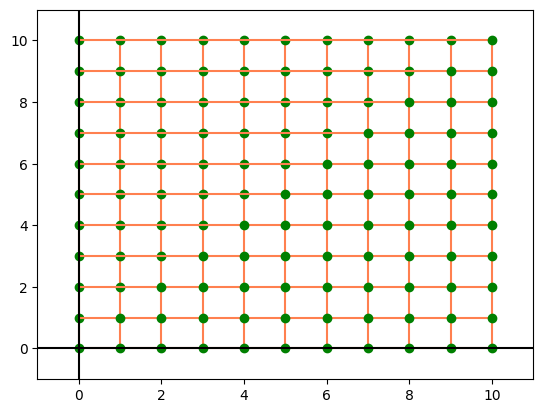

In [ ]:
x = range(0, 11)
n = len(x)
print(x)

for k in range(11):
  plt.plot(x,np.zeros(11)+k,color=(1, 0.5, 0.31))
  plt.plot(np.zeros(11) + k,x,color=(1, 0.5, 0.31))
  plt.plot(np.zeros(11)+k,x,'o',color=(0, 0.5, 0))

plt.axhline(0, color="black")
plt.axvline(0, color="black")

plt.xlim(-1, 11)
plt.ylim(-1, 11)

plt.show()

De ese modo, cada punto verde sera un punto vector inicial con el cual se ejecutara el programa

Probemos la idea con la funcion Drop-Wave

In [ ]:
# Primero generemos los puntos

x1=np.linspace(-5.12,5.12,25, endpoint=True)
x2=np.linspace(-5.12,5.12,25, endpoint=True)

k = len(x1)

# Declaramos las variables donde guardaremos los datos
# A1: Variable donde se guardan todos los vectores iniciales
#     correspondientes a cada vector optimo
# A2: Variable donde se guardan todos los vectores optimos
#
# A3: Variable donde se guardan todos los valores de la funcion objetivo
#     correspodientes a cada vector optimo

A1 = np.zeros([k*k,2])
A2 = np.zeros([k*k,2])
A3 = np.zeros(k*k)

y1=0
e = 0.00001
w=0
for w1 in range(k):
  for w2 in range(k):


    x0 = np.array([x1[w1],x2[w2]])

    xo,fxo,y1 = metodo_newton(drop,x0,e)

    A1[w] = x0
    A2[w] = xo
    A3[w] = fxo

    if y1>20 or fxo==-mt.inf or fxo==mt.inf:
      A2[w] = None
      A3[w] = None

    w = w + 1

# Por ultimo, solo nos falta localizar el valor mas pequeño encontrado

I = np.where(A3==min(A3))

print()
#I = r1.index(max(r1))

print('El minimo local mas pequeño encontrado es\n')
print(A3[I[0]][0],'en',A2[I[0]][0])





El minimo local mas pequeño encontrado es

-1.0 en [0. 0.]


Pienso que este es el metodo mas intuitivo, pero es muy tardado, ya que revisa cada punto

probemos con la funcion Six-Hump Camel function la misma idea

In [ ]:
# Primero generemos los puntos

x1=np.linspace(-3,3,25, endpoint=True)
x2=np.linspace(-2,2,25, endpoint=True)

k = len(x1)

A1 = np.zeros([k*k,2])
A2 = np.zeros([k*k,2])
A3 = np.zeros(k*k)

y1=0
e = 0.00001
w=0
for w1 in range(k):
  for w2 in range(k):

    x0 = np.array([x1[w1],x2[w2]])
    xo,fxo,y1 = metodo_newton(camel_6,x0,e)

    A1[w] = x0
    A2[w] = xo
    A3[w] = fxo

    if y1>20 or fxo==-mt.inf or fxo==mt.inf:
      A2[w] = None
      A3[w] = None

    w = w + 1

# Por ultimo, solo nos falta localizar el valor mas pequeño encontrado

I = np.where(A3==min(A3))




print('El minimo local mas pequeño encontrado es\n')
print(A3[I][0],'en',A2[I][0])


El minimo local mas pequeño encontrado es

-1.0316284534898774 en [-0.08984201  0.7126564 ]


#Algoritmos geneticos

In [ ]:
import random as rd

La idea de recorrer todos los puntos del mallado es intuitiva pero ineficiente, por lo que se deberian buscar opciones mas eficientes

En este caso, la idea de un algoritmo gentico parece que es una mejor idea

Los algoritmos genéticos forman parte de la llamada computación evolutiva, que a su vez suele clasificarse dentro de las técnicas de Inteligencia Artificial

Un algoritmo genético es una clase de algoritmo perteneciente a la Computación Evolutiva. Es un algoritmo de búsqueda basado en la mecánica de la selección natural. Estos algoritmos hacen evolucionar una población de individuos a través de acciones aleatorias semejantes a las que actúan según la teoría de la evolución biológica como mutaciones y recombinaciones genéticas. Además, hacen una selección de acuerdo con alguna función de aptitud que decide cuáles son los individuos más aptos que sobreviven, y cuáles los menos aptos que son descartados.

En esta ocasion, usaremos la codificación binaria, aunque no es la única forma de representar a un individuo. Existe también la codificación real, que implica que el fenotipo y genotipo coincide. En otras palabras, la codificación real del individuo con fenotipo 10, sería 10 también.

Son las cadenas binarias las que pasan por operaciones de recombinación genética y mutaciones.

De forma más particular, un algoritmo genético simple ejecuta tres operaciones básicas:

1. Reproducción
2. Cruza
3. Mutación


**Reproducción**

La reproducción es un proceso de selección de cromosomas para el posterior apareamiento e intercambio de genes, con base en el valor de su función de aptitud (la que indica qué tan apto es un individuo). Idealmente, se seleccionan con mayor probabilidad los individuos con una función de aptitud alta, logrando así una mayor probabilidad de contribuir con descendencia a la próxima generación.

Uno de los métodos más usado para la selección de individuos es la llamada rueda de ruleta. Este método asigna un porcentaje de la ruleta, es decir una probabilidad, a cada individuo según su aptitud; donde el 100% de la ruleta es la suma de las aptitudes.

Como ejemplo, observa la ruleta que se construye para una población de cuatro individuos con aptitudes: 25, 784, 441
y 961.

los porcentas de aptitud serian

|**Numero** |**Aptitud**|
|-----------|-------|
|25         |  1%   |
|441        | 20%   |
|784        | 35%   |      
| 961       | 43%   |


La cruza es un operador que lleva a cabo el intercambio de información genética de dos individuos de la población, a los que llamaremos padres, en el cual se combinan sus genes, que son los bits de las cadenas binarias, para generar descendencia o hijos.

Toma por ejemplo la cruza de estas dos cadenas binarias.

\begin{align}
  10|10 &-\\
        &- --10  00\\
  10|00 &-  
\end{align}

**Mutación**

La mutación modifica bits de la cadena binaria de forma aleatoria con cierta probabilidad. Una mutación se vería así:

\begin{equation}
  1000---1001
\end{equation}

El objetivo de la mutación es generar nuevos individuos o hijos que formarán parte de la nueva población. Este operador permite la variabilidad en la población, con la finalidad de no quedar estancado en un máximo o mínimo local. Eso contribuye a la exploración de todo el espacio de búsqueda evitando así la convergencia prematura.


Primero consideremos un ejemplo simple, de programacion entera no lineal

Maximizar

\begin{equation}
  f(x) = 12x^5 + 975x^4 + 28000x^3 + 345,000x^2 + 1,800,000x
\end{equation}

sujeto a

\begin{equation}
  0\leq x \leq 31
\end{equation}

El primer paso consiste en generar una poblacion inicial

En este caso, sera de 10 numero aleatorios entre 0 y 31

In [ ]:
# Definimos la funcion objetivo

def funcion(x):
  f = 12*(x**5) - 975*(x**4) + 28000*(x**3) - 345000*(x**2) + 1800000*x
  return(f)

In [ ]:
def generador(b):
  x = rd.random()
  c=0;
  for y in range(0,b+1):
    if x>y/b:
      if x<=(y+1)/b:
        c=c+y+1
        break
  return(c)

In [ ]:
def muestra(n,b):
  M = []
  for x in range(n):
    M.append(generador(b))
  return(M)

In [ ]:
def aptitud(M):
  A = []
  for x in range(len(M)):
    A.append(funcion(M[x]))
  return(A)

In [ ]:
def seleccion(A):
  A.sort()
  Mas = A[6:]
  menos = A[0:2]
  return(Mas+menos)

In [ ]:
P  = muestra(10,31)
print(P)

[14, 21, 31, 22, 4, 22, 28, 28, 20, 28]


In [ ]:
A = aptitud(P)
print(A)

[3410288, 4353237, 1519837, 4207984, 3234688, 4207984, 1810816, 1810816, 4400000, 1810816]


In [ ]:
S = seleccion(A)
print(S)

[4207984, 4207984, 4353237, 4400000, 1519837, 1810816]
